In [1]:
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

## Generate Plot

In [2]:
samplerate, data = scipy.io.wavfile.read("OdeToJoy.wav")

fs = 8000
print("Data length", len(data))
data = data / max(abs(data)) # Normalize our data a little to remove noise

Data length 80000


(250.0, 500.0)

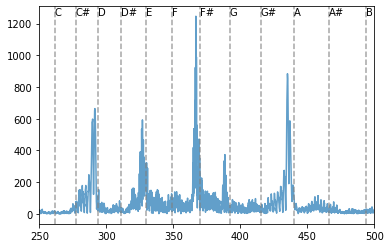

In [3]:
n = len(data)
p = abs(np.fft.fft(data))
f = np.arange(0, n) * fs / n
plt.plot(f, p, alpha=.7)


notes = [261.6, 277.2, 293.7, 311.1, 329.6, 349.2, 370, 392, 415.3, 440, 466.2, 493.9]
notenames = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
for note, notename in zip(notes, notenames):
    plt.axvline(note, c='grey', ls='--', alpha=.7)
    plt.text(note, max(abs(p)) + 5, notename, fontsize=10)
plt.xlim(250, 500)


## Analysis
This is in the key of F#, as that is clearly the most dominant note. The piano is rather flat, since a lot of the notes fall slightly to the left of their expected frequencies.

## Test - Python Spectrogram

/Users/anirudhkamath/opt/anaconda3/envs/MATH7203/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


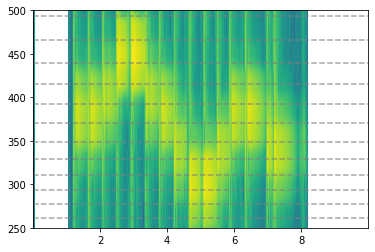

In [4]:
plt.specgram(data, Fs=8000)
plt.ylim(250, 500)
for note, notename in zip(notes, notenames):
    plt.axhline(note, c='grey', ls='--', alpha=.7)


## Analysis
Here, it's harder to see than MATLAB's spectrogram function, but the gist is that you can see that it starts off at F# around 370 Hz, progresses to G and A, peaking at around 450, and going back down
towards F#, then going downwards to D, going up to F# and finishing at E.

I couldn't think of a better way to test this, so this is the best I could come up with.